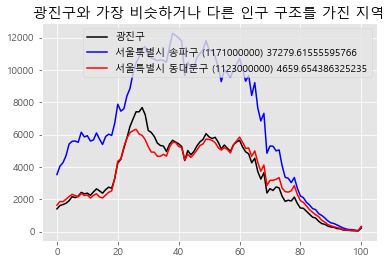

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import csv

plt.rc('font', family='Malgun Gothic')
f = open("202012_202012_연령별인구현황_월간.csv", 'r', encoding = 'cp949')
data = csv.reader(f)
header = next(data)
header2 = next(data)
max = 0
min = 999999999999999999999
ndarray = []

for row in data:
    ndarray.append(np.array(row))
    
for i in ndarray:
    if(i[0].find('광진구') != -1):
        GangGin = i

#GangGin 정수화 시키기
intGangGin = []
for i in range(len(GangGin[3:])):
    intGangGin.append(int(GangGin[i+3].replace(',','')))
intGangGin = np.array(intGangGin)

#가장 비슷한 것과 다른 것 찾기
for i in ndarray:
    if(i[0].find('광진구') != -1):
        continue
    else:
        introw = []
        for j in range(len(i[3:])):
            introw.append(int(i[j+3].replace(',','')))
        introw = np.array(introw)
        
        temp = intGangGin-introw
        temp = (temp*temp)
        gap = 0
        for j in temp:
            gap += j
        if max < gap:
            max = gap
            maxIndex = introw
            stringmaxIndex = i
            maxvar = np.sqrt(gap)
        if min > gap:
            min = gap
            minIndex = introw
            stringminIndex = i
            minvar = np.sqrt(gap)
        
            
maxlabel = stringmaxIndex[0] + " " + str(maxvar)
minlabel = stringminIndex[0] + " " + str(minvar)
plt.style.use('ggplot')
plt.title('광진구와 가장 비슷하거나 다른 인구 구조를 가진 지역')
plt.plot(intGangGin, label = "광진구", color = 'black')
plt.plot(maxIndex, label = maxlabel, color = 'blue')
plt.plot(minIndex, label = minlabel, color = 'red')
plt.legend()
plt.show()